In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load main coronavirus data from DB

path = r'..\COVID-19\csse_covid_19_data\csse_covid_19_time_series'

Confirmed = pd.read_csv(path + "/time_series_19-covid-Confirmed.csv", index_col=None, header=0)
Deaths = pd.read_csv(path + "/time_series_19-covid-Deaths.csv", index_col=None, header=0)
Recovered = pd.read_csv(path + "/time_series_19-covid-Recovered.csv", index_col=None, header=0)

In [3]:
#load supplemental data

supp = r'./supplemental_data'

bloodtypes = pd.read_csv(supp + "/bloodtypes.csv", index_col=None, header=0)
gdp = pd.read_csv(supp + "/gdp.csv", index_col=None, header=0)
healthcare_rank = pd.read_csv(supp + "/healthcare_rank.csv", index_col=None, header=0)
smoking_rate = pd.read_csv(supp + "/smoking_rate.csv", index_col=None, header=0)

In [14]:
#classes
class Country:
    def __init__(self, n = ''):
        self.name = n
        self.population = healthcare_rank[healthcare_rank.loc[:, 'name'] == n]['pop2020'].sum()
        self.latitude = Confirmed[Confirmed.loc[:, 'Country/Region'] == n]['Long'].sum()
        self.longitude = Confirmed[Confirmed.loc[:, 'Country/Region'] == n]['Lat'].sum()
        self.confirmed = Confirmed[Confirmed.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        self.deaths = Deaths[Deaths.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        self.recovered = Recovered[Recovered.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        self.actual = self.confirmed - (self.deaths + self.recovered) 
        self.newCases = Confirmed[Confirmed.loc[:, 'Country/Region'] == n].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis = 1).sum()
        
        self.healthcare_rank = healthcare_rank[healthcare_rank.loc[:, 'name'] == n]['healthcareRank'].sum()/healthcare_rank['healthcareRank'].max()
        self.gdp_per_capita = gdp[gdp.loc[:, 'country'] == n]['gdpPerCapita'].sum()
        self.bloodtype_percentages = bloodtypes[bloodtypes.loc[:, 'Country'] == n].drop(['Country', 'Population'], axis = 1).to_numpy()[0]
        for i in range(8):
            self.bloodtype_percentages[i] = self.bloodtype_percentages[i].strip('%')
            self.bloodtype_percentages[i] = float(self.bloodtype_percentages[i])/100
        self.smoking_rate = smoking_rate[smoking_rate.loc[:, 'name'] == n]['totalSmokingRate']/100
        
        for i in range(1, len(self.newCases)):
            self.newCases[i] = self.newCases[i] - self.newCases[i-1]
        return
    
    name = ''
    population = 0              # in thousands
    latitude = ''               # in degrees
    longitude = ''              # in degrees
    confirmed = []
    deaths = []
    recovered = []
    actual = []
    newCases = []   
    healthcare_rank = 0         # normalized to range [0:1]
    gdp_per_capita = 0          # in USD
    bloodtype_percentages = []  # in range [0:1] (percents)
    smoking_rate = 0            # in range [0:1] (percents)
    
    pass


In [15]:
#analyzed country

analyzedCountry = Country('Poland')
print(analyzedCountry.longitude)
print(analyzedCountry.bloodtype_percentages)

51.9194
[0.31 0.32 0.15 0.07 0.06 0.06 0.02 0.01]


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 <a list of 58 Text xticklabel objects>)

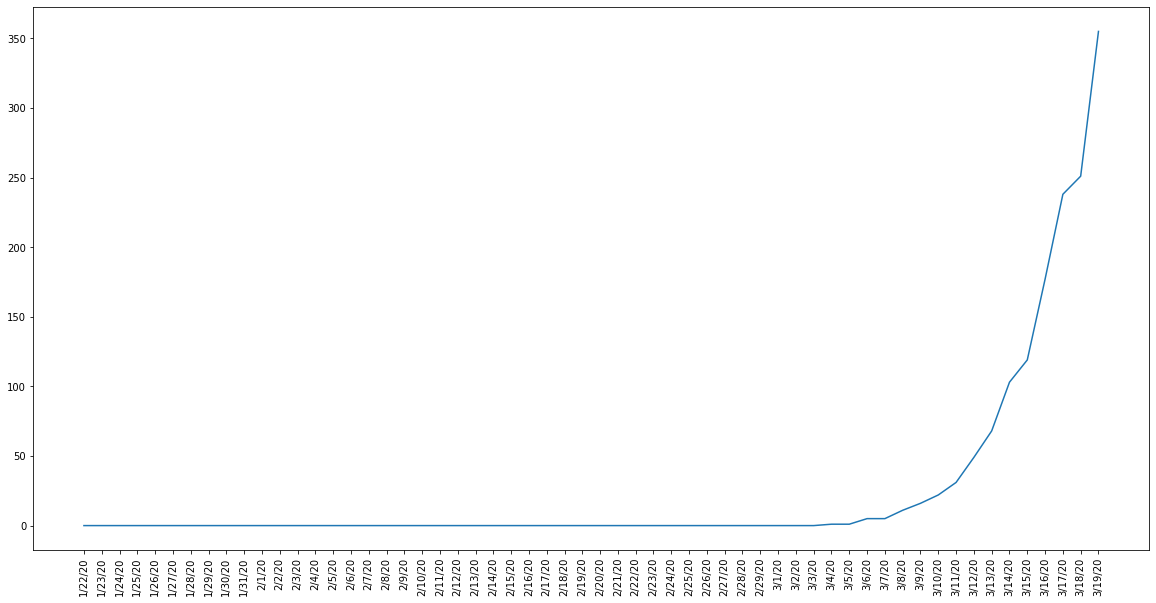

In [16]:
#display basic data for chosen country

plt.figure(figsize=(20, 10))
plt.plot(analyzedCountry.confirmed)
#plt.plot(analysedCountry.deaths)
#plt.plot(analysedCountry.recovered)
#plt.plot(analysedCountry.actual)
#plt.plot(analysedCountry.newCases)

plt.xticks(rotation=90)

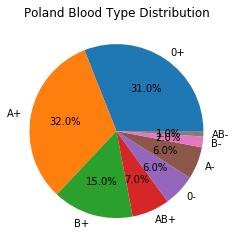

In [17]:
labels = ['0+', 'A+', 'B+', 'AB+', '0-', 'A-', 'B-', 'AB-']
plt.title(analyzedCountry.name + " Blood Type Distribution")
plt.pie(analyzedCountry.bloodtype_percentages, labels=labels, autopct='%1.1f%%')
plt.show()

In [18]:
print(analyzedCountry.gdp_per_capita)

16996.8719


In [19]:
print(analyzedCountry.healthcare_rank)

0.5


In [20]:
print(analyzedCountry.smoking_rate)

90    28.05
Name: totalSmokingRate, dtype: float64
